<a href="https://colab.research.google.com/github/JamilyaSultan/INDE-597-Deep-and-Reinforcement-Learning/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

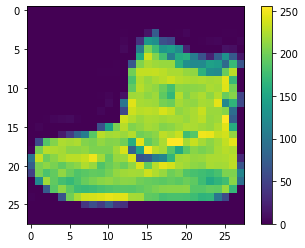

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

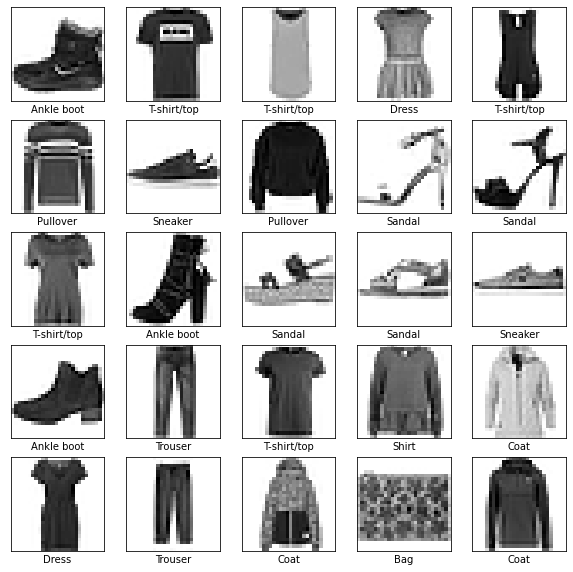

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4957 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3357 - accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3124 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2660 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2576 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2472 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.23

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2235 - accuracy: 0.9168
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2176 - accuracy: 0.9190
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2112 - accuracy: 0.9206
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2046 - accuracy: 0.9230
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1982 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1929 - accuracy: 0.9278
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1868 - accuracy: 0.9296
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1843 - accuracy: 0.9305
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1775 - accuracy: 0.9333
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.173

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3616 - accuracy: 0.8881 - 1s/epoch - 3ms/step

Test accuracy: 0.8881000280380249


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([3.3994044e-11, 4.0096480e-16, 3.4696790e-15, 1.4472433e-16,
       7.8509603e-12, 5.3144913e-06, 3.4754070e-12, 1.0301517e-03,
       6.2603728e-11, 9.9896455e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

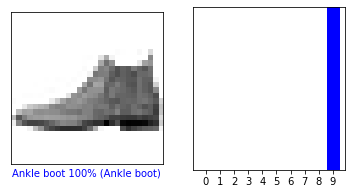

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

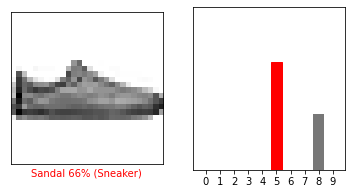

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

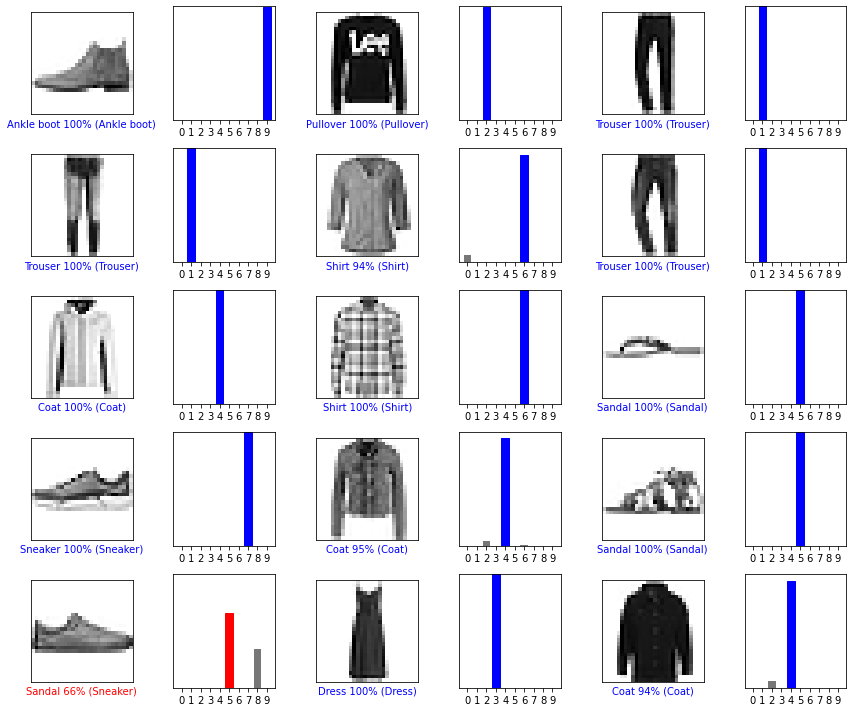

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.0942401e-04 1.1389061e-20 9.9771106e-01 1.2606592e-12 1.8294064e-03
  3.0648424e-15 1.5004078e-04 2.0186794e-22 2.1172801e-12 4.7194592e-22]]


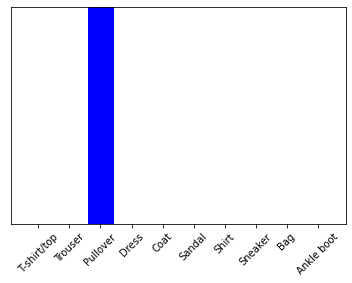

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
model_1.fit(train_images, train_labels, epochs=10)



Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4910 - accuracy: 0.8238
Epoch 2/10
1222/1875 [==================>...........] - ETA: 1s - loss: 0.3713 - accuracy: 0.8639

KeyboardInterrupt: ignored

In [ ]:

test_loss, test_acc = model_1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 0.3434 - accuracy: 0.8816 - 579ms/epoch - 2ms/step

Test accuracy: 0.881600022315979


Functional API

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers

inputs = keras.Input(shape=(28,28,1), name="my_input")
features = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 dense_22 (Dense)            (None, 28, 28, 128)       256       
                                                                 
 dense_23 (Dense)            (None, 28, 28, 10)        1290      
                                                                 
Total params: 1,546
Trainable params: 1,546
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss= "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:

history = model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


ValueError: ignored

Subclass


In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers

class FashionMnist(keras.Model):

    def __init__ (self):
        super().__init__()
        self.flat_layer = layers.Flatten(input_shape=(28, 28))
        self.layer_1 = layers.Dense(128, activation='relu')
        self.layer_2 = layers.Dense(64, activation='relu')
        self.outfit_classifier = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        features = self.flat_layer(inputs)
        features = self.layer_1(features)
        features = self.layer_2(features)
        output = self.outfit_classifier(features)

In [ ]:
model = FashionMnist()
output = model(train_images)

In [ ]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics='accuracy')
model.fit(train_images, train_labels, epochs=3)
model.evaluate(train_images)


Epoch 1/3


AttributeError: ignored